In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
import pandas as pd

def read_txt_to_dataframe(txt_file_path, delimiter='\t'):
    # Define column names
    column_names = ['customer_id', 'purchase_amount', 'date_of_purchase']

    # Read the TXT file into a DataFrame with specified column names
    df = pd.read_csv(txt_file_path, delimiter=delimiter, names=column_names)

    return df

# Example usage
txt_file_path = '/content/purchases.txt'  # Replace with the path to your TXT file
data_frame = read_txt_to_dataframe(txt_file_path)

# Display the DataFrame
print(data_frame)

       customer_id  purchase_amount date_of_purchase
0              760             25.0       2009-11-06
1              860             50.0       2012-09-28
2             1200            100.0       2005-10-25
3             1420             50.0       2009-07-09
4             1940             70.0       2013-01-25
...            ...              ...              ...
51238       163230             30.0       2011-11-12
51239       154410            100.0       2013-11-15
51240       189270             30.0       2014-12-23
51241       173810             30.0       2015-05-28
51242         9830             50.0       2011-11-30

[51243 rows x 3 columns]


In [ ]:
data_frame

,customer_id,purchase_amount,date_of_purchase
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25
...,...,...,...
51238,163230,30.0,2011-11-12
51239,154410,100.0,2013-11-15
51240,189270,30.0,2014-12-23
51241,173810,30.0,2015-05-28


In [ ]:
customer_purchases = data_frame.copy()

In [ ]:
customer_purchases.date_of_purchase = pd.to_datetime(customer_purchases.date_of_purchase).dt.strftime('%m-%d-%Y')
# now = '01-01-2016'
customer_purchases['days_since'] =  pd.to_datetime(customer_purchases['date_of_purchase']).apply(lambda x: (pd.to_datetime("2016-01-01") - x).days)

In [ ]:
customer_purchases.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       51243 non-null  int64  
 1   purchase_amount   51243 non-null  float64
 2   date_of_purchase  51243 non-null  object 
 3   days_since        51243 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ MB


In [ ]:
customer_purchases.head()

,customer_id,purchase_amount,date_of_purchase,days_since
0,760,25.0,11-06-2009,2247
1,860,50.0,09-28-2012,1190
2,1200,100.0,10-25-2005,3720
3,1420,50.0,07-09-2009,2367
4,1940,70.0,01-25-2013,1071


# COMPUTING RECENCY, FREQUENCY, MONETARY VALUE

In [ ]:
del RFM_table

In [ ]:
## Compute recency, frequency, and monetary_value
def rec_freq_value(x):
    recency        = x['days_since'].min()
    first_purchase = x['days_since'].max()
    frequency      = x['days_since'].count()
    monetary_value = x['purchase_amount'].mean()
    c = ['recency', 'first_purchase', 'frequency', 'monetary_value']
    return pd.Series([recency, first_purchase, frequency, monetary_value], index = c)
RFM_table = customer_purchases.groupby('customer_id').apply(rec_freq_value)

In [ ]:
RFM_table

,recency,first_purchase,frequency,monetary_value
customer_id,,,,
10,3829.0,3829.0,1.0,30.000000
80,343.0,3751.0,7.0,71.428571
90,758.0,3783.0,10.0,115.800000
120,1401.0,1401.0,1.0,20.000000
130,2970.0,3710.0,2.0,50.000000
...,...,...,...,...
263820,1.0,1.0,1.0,10.000000
263870,135.0,135.0,1.0,50.000000
263880,34.0,34.0,1.0,20.000000


# RMF SEGMENTAION

In [ ]:
del RFM_table['first_purchase']

In [ ]:
RFM_table.head()

,recency,frequency,monetary_value
customer_id,,,
10,3829.0,1.0,30.000000
80,343.0,7.0,71.428571
90,758.0,10.0,115.800000
120,1401.0,1.0,20.000000
130,2970.0,2.0,50.000000


In [ ]:
RFM_table.reset_index(drop=False,inplace=True)

In [ ]:
RFM_table.head()

,customer_id,recency,frequency,monetary_value
0,10,3829.0,1.0,30.000000
1,80,343.0,7.0,71.428571
2,90,758.0,10.0,115.800000
3,120,1401.0,1.0,20.000000
4,130,2970.0,2.0,50.000000


In [ ]:
RFM_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18417 entries, 0 to 18416
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     18417 non-null  int64  
 1   recency         18417 non-null  float64
 2   frequency       18417 non-null  float64
 3   monetary_value  18417 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 575.7 KB


In [ ]:
import pandas as pd
RFM_table['r_score'] = pd.cut(RFM_table['recency'], bins=[-float('inf'), 365, 730, float('inf')], labels=[3, 2, 1])
RFM_table['r_score'] = RFM_table['r_score'].astype(int)
RFM_table

,customer_id,recency,frequency,monetary_value,r_score
0,10,3829.0,1.0,30.000000,1
1,80,343.0,7.0,71.428571,3
2,90,758.0,10.0,115.800000,1
3,120,1401.0,1.0,20.000000,1
4,130,2970.0,2.0,50.000000,1
...,...,...,...,...,...
18412,263820,1.0,1.0,10.000000,3
18413,263870,135.0,1.0,50.000000,3
18414,263880,34.0,1.0,20.000000,3
18415,263890,5.0,1.0,54.000000,3


In [ ]:

RFM_table['f_score'] = pd.cut(RFM_table['frequency'], bins=[-float('inf'), 1, 2, float('inf')], labels=[1, 2, 3])

RFM_table['f_score'] = RFM_table['f_score'].astype(int)

RFM_table.head()


,customer_id,recency,frequency,monetary_value,r_score,f_score
0,10,3829.0,1.0,30.000000,1,1
1,80,343.0,7.0,71.428571,3,3
2,90,758.0,10.0,115.800000,1,3
3,120,1401.0,1.0,20.000000,1,1
4,130,2970.0,2.0,50.000000,1,2


In [ ]:
# Assuming RFM_table is your DataFrame
RFM_table['m_score'] = pd.cut(RFM_table['monetary_value'], bins=[-float('inf'), 20, 50, float('inf')], labels=[1, 2, 3])

# Convert the 'm_score' column to integer type if needed
RFM_table['m_score'] = RFM_table['m_score'].astype(int)

# Display the updated DataFrame
RFM_table.head()


,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score
0,10,3829.0,1.0,30.000000,1,1,2
1,80,343.0,7.0,71.428571,3,3,3
2,90,758.0,10.0,115.800000,1,3,3
3,120,1401.0,1.0,20.000000,1,1,1
4,130,2970.0,2.0,50.000000,1,2,2


In [ ]:
# Assuming RFM_table is your DataFrame
RFM_table['RFM_Score'] = RFM_table['r_score'] * 100 + RFM_table['f_score'] * 10 + RFM_table['m_score']

# Display the updated DataFrame
RFM_table.head()

,customer_id,recency,frequency,monetary_value,r_score,f_score,m_score,RFM_Score
0,10,3829.0,1.0,30.000000,1,1,2,112
1,80,343.0,7.0,71.428571,3,3,3,333
2,90,758.0,10.0,115.800000,1,3,3,133
3,120,1401.0,1.0,20.000000,1,1,1,111
4,130,2970.0,2.0,50.000000,1,2,2,122


In [ ]:
RFM_table.groupby('r_score')['customer_id'].count()

r_score
1    11061
2     1958
3     5398
Name: customer_id, dtype: int64

In [ ]:
# Assuming RFM_table is your DataFrame
grouped_counts = RFM_table.groupby(['r_score', 'f_score', 'm_score']).size().reset_index(name='customer_count')

# Display the result
print(grouped_counts)


    r_score  f_score  m_score  customer_count
0         1        1        1            2394
1         1        1        2            3304
2         1        1        3             985
3         1        2        1             590
4         1        2        2            1201
5         1        2        3             376
6         1        3        1             366
7         1        3        2            1296
8         1        3        3             549
9         2        1        1             220
10        2        1        2             491
11        2        1        3             190
12        2        2        1              58
13        2        2        2             199
14        2        2        3              86
15        2        3        1              87
16        2        3        2             393
17        2        3        3             234
18        3        1        1             331
19        3        1        2             726
20        3        1        3     

In [ ]:
grouped_data = RFM_table.groupby(['r_score', 'f_score', 'm_score'])
result = grouped_data.agg(
    customer_count=('customer_id', 'count'),
    avg_monetary_value=('monetary_value', 'mean'),
    sales_amount=('monetary_value', lambda x: x.mean() * x.count())
).reset_index()

result = result.sort_values(by='sales_amount', ascending=False)
result

,r_score,f_score,m_score,customer_count,avg_monetary_value,sales_amount
2,1,1,3,985,162.770193,160328.640000
26,3,3,3,1182,135.622475,160305.765888
1,1,1,2,3304,36.137548,119398.460000
20,3,1,3,407,202.946462,82599.210000
8,1,3,3,549,125.405206,68847.458195
25,3,3,2,1641,34.603701,56784.672904
5,1,2,3,376,141.240306,53106.355000
7,1,3,2,1296,33.748089,43737.522945
4,1,2,2,1201,33.654305,40418.820000
11,2,1,3,190,206.727474,39278.220000


In [ ]:
result = result.reset_index()

In [ ]:
result = result.drop('index',axis=True)

In [ ]:
result.head(10)

,r_score,f_score,m_score,customer_count,avg_monetary_value,sales_amount
0,1,1,3,985,162.770193,160328.640000
1,3,3,3,1182,135.622475,160305.765888
2,1,1,2,3304,36.137548,119398.460000
3,3,1,3,407,202.946462,82599.210000
4,1,3,3,549,125.405206,68847.458195
5,3,3,2,1641,34.603701,56784.672904
6,1,2,3,376,141.240306,53106.355000
7,1,3,2,1296,33.748089,43737.522945
8,1,2,2,1201,33.654305,40418.820000
9,2,1,3,190,206.727474,39278.220000


# K-Means

In [ ]:
customer_purchases_rfm = RFM_table[['customer_id','recency','frequency','monetary_value']]

In [ ]:
customer_purchases_rfm.set_index('customer_id', inplace=True)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_purchases_rfm)

# Finding the Optimal number of clusters

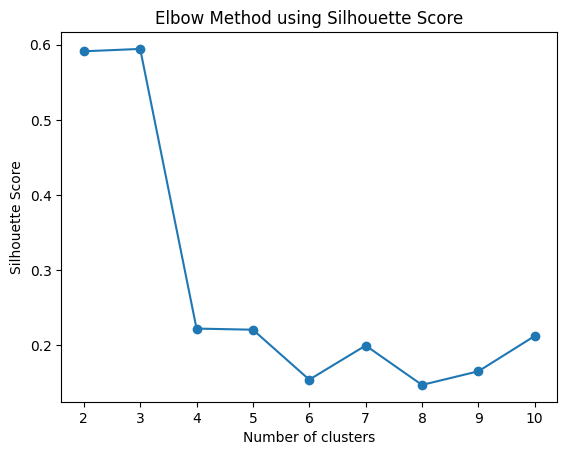

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Assuming scaled_features is your data
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=14)
    kmeans.fit(scaled_features)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(customer_purchases_rfm, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Elbow Method using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# k means using 8 clusters

In [ ]:
customer_purchases_rfm1 = customer_purchases_rfm.copy()

In [ ]:
from sklearn.cluster import KMeans

optimal_num_clusters =  8 ## taking 8

kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(customer_purchases_rfm1)
customer_purchases_rfm1['cluster_kmeans'] = cluster_labels
customer_purchases_rfm1.head()

,recency,frequency,monetary_value,cluster_kmeans
customer_id,,,,
10,3829.0,1.0,30.000000,7
80,343.0,7.0,71.428571,5
90,758.0,10.0,115.800000,0
120,1401.0,1.0,20.000000,4
130,2970.0,2.0,50.000000,1


In [ ]:
customer_purchases_rfm1.groupby('cluster_kmeans')['monetary_value'].count()

cluster_kmeans
0    2851
1    2092
2    4621
3    2370
4    2251
5    2639
6      55
7    1538
Name: monetary_value, dtype: int64

# Centroides of each Clusters

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit the data and get cluster labels
cluster_labels = kmeans.fit_predict(customer_purchases_rfm1[['recency','frequency','monetary_value']])

## customer_purchases_rfm['cluster'] = cluster_labels

# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Create a DataFrame with centroid values
centroid_df = pd.DataFrame(cluster_centroids, columns=['recency','frequency','monetary_value'])

# Add a 'cluster' column to the centroid_df
centroid_df['cluster'] = range(1, optimal_num_clusters + 1)

In [ ]:
# Display the DataFrame with centroid values
centroid_df.set_index('cluster', inplace=True)

# The Cluster Center Of each Cluster.

In [ ]:
centroid_df

,recency,frequency,monetary_value
cluster,,,
1,937.178183,2.296387,49.149232
2,2698.202204,1.480115,40.079209
3,67.079420,4.562865,66.237104
4,2078.775158,1.898947,41.966546
5,1450.739246,2.317517,45.895667
6,428.983327,3.354301,54.043297
7,1073.909091,2.290909,2258.247610
8,3301.513690,1.178618,42.068333


# most important cluster would be the  7th Cluster
-  The Monetory Value is much higher compared to the others
-  It have a moderate recency , moderate frequency amd very high monetary_value
-  This cluster has most valuable and loyal customers  

# Marketing strategy for this 7th cluster would be --

- to increase recency by Re-engagement campaign
- and also by retention focused communication

# The second most important cluster would be the 3rd cluster

- high recency , high frequency , and good monetary value makes this important
- this cluster has loyal, active and engaged customers

# Marketing strategy for this 3rd cluster would be--

- To get the high monetary value out of them Cross-selling method would be good
- Also combining that with Targeted upselling would be a good strategy


# cluster 8 here is inactive/dormant.


# cluster 2 here is also cold and needs re-engagement campaign.

# cluster 4 here is shows interest (suggested by high frequency) so it needs incentive in form of discounts and offers.



# cluster 6 here is valuable ,somehow active that shows recent activity and can be a reliable source of revenue . so, it needs loyalty incentive and surprise offers.

# ================================================================================================================

# MANAGERIAL SEGMENTATION

In [ ]:
del RFM_table

In [ ]:
RFM_table = customer_purchases.groupby('customer_id').apply(rec_freq_value)

In [ ]:
RFM_table.head()

,recency,first_purchase,frequency,monetary_value
customer_id,,,,
10,3829.0,3829.0,1.0,30.000000
80,343.0,3751.0,7.0,71.428571
90,758.0,3783.0,10.0,115.800000
120,1401.0,1401.0,1.0,20.000000
130,2970.0,3710.0,2.0,50.000000


# We then moved to “domain rules” to get into a “Managerial Segmentation”


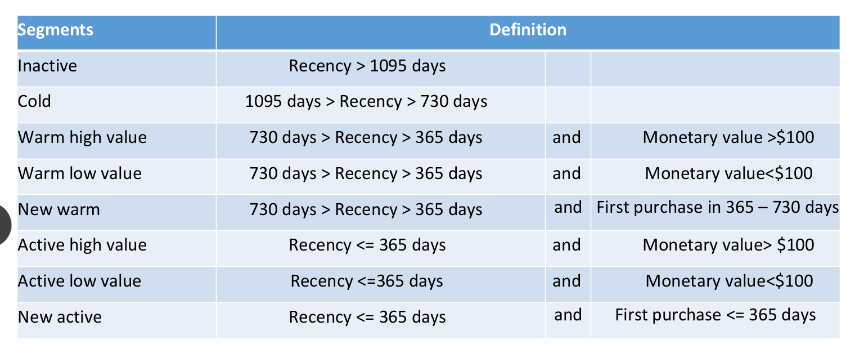


In [ ]:
RFM_table['segment'] = np.where(RFM_table['recency'] > 365*3, 'inactive', 'NA')

In [ ]:
RFM_table['segment'].value_counts()

NA          9259
inactive    9158
Name: segment, dtype: int64

In [ ]:
RFM_table['segment'] = np.where(RFM_table['recency']  > 365*3, 'inactive', np.where(RFM_table['recency']  > 365*2, 'cold', 'NA'))

In [ ]:
RFM_table['segment'].value_counts()

inactive    9158
NA          7356
cold        1903
Name: segment, dtype: int64

In [ ]:
def four_segment_solution (s):
    s.loc[(s['recency'] > 365*3), 'segment'] = "inactive" # creating a new column seg with our values
    s.loc[(s['recency'] <= 365*3), 'segment'] = "active" # creating a new column seg with our values
    s.loc[(s['recency'] <= 365*3) & (s['recency'] > 365*2), 'segment'] = "cold"
    s.loc[(s['recency'] <= 365*2) & (s['recency'] > 365*1), 'segment'] = "warm"

In [ ]:
four_segment_solution(RFM_table)

In [ ]:
RFM_table['segment'].value_counts()

inactive    9158
active      5398
warm        1958
cold        1903
Name: segment, dtype: int64

## COMPLETE SEGMENT SOLUTION

In [ ]:
## Complete segment solution using which, and exploiting previous test as input
def complete_segment_solution (s):
    s.loc[(s['segment'] == "warm") & (s['first_purchase'] <= 365*2), 'segment'] = "new warm"
    s.loc[(s['segment'] == "warm") & (s['monetary_value'] < 100), 'segment'] = "warm low value"
    s.loc[(s['segment'] == "warm") & (s['monetary_value'] >= 100), 'segment'] = "warm high value"
    s.loc[(s['segment'] == "active") & (s['first_purchase'] <= 365), 'segment'] = "new active"
    s.loc[(s['segment'] == "active") & (s['monetary_value'] < 100), 'segment'] = "active low value"
    s.loc[(s['segment'] == "active") & (s['monetary_value'] >= 100), 'segment'] = "active high value"
complete_segment_solution(RFM_table)

In [ ]:
RFM_table

,recency,first_purchase,frequency,monetary_value,segment
customer_id,,,,,
10,3829.0,3829.0,1.0,30.000000,inactive
80,343.0,3751.0,7.0,71.428571,active low value
90,758.0,3783.0,10.0,115.800000,cold
120,1401.0,1401.0,1.0,20.000000,inactive
130,2970.0,3710.0,2.0,50.000000,inactive
...,...,...,...,...,...
263820,1.0,1.0,1.0,10.000000,new active
263870,135.0,135.0,1.0,50.000000,new active
263880,34.0,34.0,1.0,20.000000,new active


In [ ]:
RFM_table['segment'] = RFM_table['segment'].astype('category')

In [ ]:
RFM_table['segment'].value_counts()

inactive             9158
active low value     3313
cold                 1903
new active           1512
new warm              938
warm low value        901
active high value     573
warm high value       119
Name: segment, dtype: int64

In [ ]:
# Re-order and display results
RFM_table['segment'] = RFM_table['segment'].astype('category')
RFM_table['segment'].cat.reorder_categories(['inactive',
                                                           'cold',
                                                           'warm high value',
                                                           'warm low value',
                                                           'new warm',
                                                           'active high value',
                                                           'active low value' ,
                                                           'new active'], inplace = True)

<ipython-input-135-28ce59cde018>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  RFM_table['segment'].cat.reorder_categories(['inactive',


In [ ]:
## Compute recency, frequency, and monetary_value
def rec_freq_value_2 (x):
    recency        = x['days_since'].min() - 365
    first_purchase = x['days_since'].max() - 365
    frequency      = x['days_since'].count()
    monetary_value = x['purchase_amount'].mean()
    c = ['recency', 'first_purchase', 'frequency', 'monetary_value']
    return pd.Series([recency, first_purchase, frequency, monetary_value], index =c )

In [ ]:
RFM_table_2014 = customer_purchases.loc[customer_purchases['days_since']  > 365]
RFM_table_2014 = RFM_table_2014.groupby('customer_id').apply(rec_freq_value_2)
print (RFM_table_2014)

             recency  first_purchase  frequency  monetary_value
customer_id                                                    
10            3464.0          3464.0        1.0            30.0
80             302.0          3386.0        6.0            70.0
90             393.0          3418.0       10.0           115.8
120           1036.0          1036.0        1.0            20.0
130           2605.0          3345.0        2.0            50.0
...              ...             ...        ...             ...
235200          21.0            21.0        1.0           100.0
235210          89.0            89.0        1.0           500.0
236310           6.0             6.0        1.0            30.0
236660         390.0           684.0        2.0            75.0
245840          48.0            48.0        1.0            50.0

[16905 rows x 4 columns]


In [ ]:
complete_segment_solution(RFM_table_2014)
print(RFM_table_2014)

             recency  first_purchase  frequency  monetary_value  \
customer_id                                                       
10            3464.0          3464.0        1.0            30.0   
80             302.0          3386.0        6.0            70.0   
90             393.0          3418.0       10.0           115.8   
120           1036.0          1036.0        1.0            20.0   
130           2605.0          3345.0        2.0            50.0   
...              ...             ...        ...             ...   
235200          21.0            21.0        1.0           100.0   
235210          89.0            89.0        1.0           500.0   
236310           6.0             6.0        1.0            30.0   
236660         390.0           684.0        2.0            75.0   
245840          48.0            48.0        1.0            50.0   

                      segment  
customer_id                    
10                   inactive  
80           active low value  


In [ ]:
RFM_table_2014['segment'].value_counts()

inactive             7512
active low value     3011
cold                 2153
new active           1437
new warm             1250
warm low value        956
active high value     475
warm high value       111
Name: segment, dtype: int64

In [ ]:
RFM_table_2014['segment'] = RFM_table_2014['segment'].astype('category')
RFM_table_2014['segment'].cat.reorder_categories(['inactive',
                                                           'cold',
                                                           'warm high value',
                                                           'warm low value',
                                                           'new warm',
                                                           'active high value',
                                                           'active low value' ,
                                                           'new active'], inplace = True)

<ipython-input-141-a93f49d9f3ff>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  RFM_table_2014['segment'].cat.reorder_categories(['inactive',


In [ ]:
RFM_table_2014.groupby(['segment']).agg('mean')

,recency,first_purchase,frequency,monetary_value
segment,,,,
inactive,2058.441294,2353.036874,1.730964,48.111199
cold,866.616814,1565.444032,2.254064,51.114605
warm high value,461.198198,1878.810811,4.414414,187.849110
warm low value,470.661088,1945.426778,4.361925,37.382060
new warm,497.317600,504.880000,1.057600,51.367653
active high value,85.338947,1838.050526,5.696842,261.902155
active low value,98.091000,1796.351378,5.633677,40.459174
new active,132.086987,142.871260,1.070981,69.725159
